In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chess = cv2.imread('chessboard.png')
chess_gray = cv2.cvtColor(chess,cv2.COLOR_BGR2GRAY)

In [3]:
def separate_corner(corners):
    x_cor = []
    y_cor = []
    for i in range(corners.shape[0]):
        x_cor.append(int(corners[i][0][0]))
        y_cor.append(int(corners[i][0][1]))
        
    return list(zip((x_cor),(y_cor)))

In [19]:
def undistort_image(image):
    
    image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, image_corners = cv2.findChessboardCorners(image_gray, patternSize = (7,7))
    #img = cv2.drawChessboardCorners(image, (7, 7), image_corners, ret)
    object_points = np.zeros(shape=(49,3))
    object_points[:,0:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
    object_points = object_points*0.0060
    object_points = np.array(object_points, dtype = np.float32)
    image_points = np.array(image_corners, dtype = np.float32)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([object_points],[image_points],image.shape[::-1][1:],None,None)
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    #fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    return mtx
    #axes[0].imshow(img)
    #axes[1].imshow(undist)
    #cv2.imwrite('Test4UD.png',undist)

In [16]:
def undistort_image2(refimage,testimage, width, height): #USED IN THIS TASK
    
    image_gray = cv2.cvtColor(testimage,cv2.COLOR_BGR2GRAY)
    ret, image_corners = cv2.findChessboardCorners(image_gray, patternSize = (7,7))
    
    chessboard_gray = cv2.cvtColor(refimage,cv2.COLOR_BGR2GRAY)
    ret, object_corners = cv2.findChessboardCorners(chessboard_gray, patternSize = (width,height))
    
    object_corners = object_corners.reshape(width*height,2)
    object_points = np.zeros(shape=(width*height,3))
    object_points[:,:2] = object_corners[:,:]
    
    object_points = np.array(object_points, dtype = np.float32)
    image_points = np.array(image_corners, dtype = np.float32)
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([object_points],[image_points],testimage.shape[::-1][1:],None,None)
    undist = cv2.undistort(testimage, mtx, dist, None, mtx)
    
    return undist
    #return ret, mtx, dist, rvecs, tvecs
    #fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    #axes[0].imshow(testimage)
    #axes[1].imshow(undist)


In [11]:
test = cv2.imread('Test1.png')
chess = cv2.imread('chessboard.png')

In [9]:
new= undistort_image1(chess,test,7,7)

In [27]:
for i in range(1,5):
    image = cv2.imread(f'Final\Angle{i}.png')
    cv2.imwrite(f'Final/Angle {i} Undistorted.png',undistort_image1(chess,image,7,7) )

In [37]:
camera_matrix = (undistort_image1(chess,test,7,7)[1])

In [38]:
camera_matrix

array([[1.16902258e+03, 0.00000000e+00, 7.40104447e+02],
       [0.00000000e+00, 1.23490383e+03, 5.23143463e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Task 2

In [4]:
chess = cv2.imread('chessboard.png')
test = cv2.imread('Known.png')

# Get Camera Matrix

In [35]:
def get_cam_matrix(image):
    
    image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, image_corners = cv2.findChessboardCorners(image_gray, patternSize = (7,7))
    #img = cv2.drawChessboardCorners(image, (7, 7), image_corners, ret)
    object_points = np.zeros(shape=(49,3))
    object_points[:,0:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
    object_points = object_points*0.0060
    object_points = np.array(object_points, dtype = np.float32)
    image_points = np.array(image_corners, dtype = np.float32)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([object_points],[image_points],image.shape[::-1][1:],None,None)
    return mtx

In [493]:
adis_cam_matrix = get_cam_matrix(test)

In [39]:
cam_matrix

array([[1.75864401e+03, 0.00000000e+00, 7.24733097e+02],
       [0.00000000e+00, 1.76927915e+03, 5.43846203e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Get Image Points (b)

In [48]:
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
ret, board_corners = cv2.findChessboardCorners(test_gray,(7,7))

In [52]:
board_corners.shape

(49, 1, 2)

In [53]:
top = board_corners[3]

In [152]:
top

array([[742.1687, 645.333 ]], dtype=float32)

In [153]:
bottom

array([[738.9612, 701.9773]], dtype=float32)

In [59]:
top[0][0]

742.1687

In [68]:
top[0]

array([742.1687, 645.333 ], dtype=float32)

In [60]:
top_x , top_y = top[0][0],top[0][1]

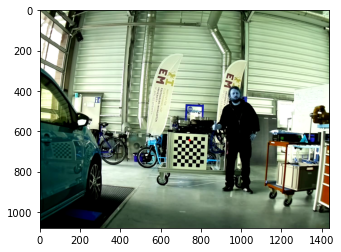

In [64]:
plt.imshow(cv2.circle(test,(int(top_x),int(top_y)),3,(255,0,0),3))

In [55]:
bottom = board_corners[24]

In [65]:
bottom_x , bottom_y = bottom[0][0],bottom[0][1]

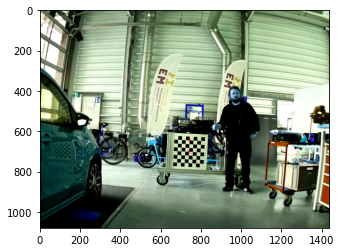

In [66]:
plt.imshow(cv2.circle(test,(int(bottom_x),int(bottom_y)),3,(255,0,0),3))

In [234]:
top_b = np.ones(shape=(3,1))

In [236]:
top_b[:2,0] = top[0]

In [167]:
top_b

array([[742.16870117],
       [645.33300781],
       [  0.        ]])

In [334]:
top_b_3d

array([[0.00991423],
       [0.05736054],
       [1.        ]])

In [209]:
bottom_b = np.ones(shape=(3,1))
bottom_b[:2,0] = bottom[0]

In [84]:
bottom_b_3d = np.dot(np.linalg.inv(cam_matrix),bottom_b)

In [361]:
bottom_b_3d.flatten()

array([0.06694648, 0.1543612 , 1.        ])

In [87]:
dist = np.linalg.norm(top_b_3d - bottom_b_3d)

In [99]:
dist*100

3.206736952393647

In [302]:
prasad_mat = np.array([[333.9666746,    0.,         626.17069072],
 [  0.    ,     327.80978588 ,480.4976051 ],
 [  0.     ,      0.     ,      1.        ]])

prasad_new_mat = np.array([[1.2300000e+03, 0.00000000e+00, 6.26170691e+02],
 [0.00000000e+00, 1.23900000e+03, 4.80497605e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [136]:
prasad_top_b_3d = np.dot(np.linalg.inv(prasad_new_mat),top_b_3d)
prasad_bottom_b_3d = np.dot(np.linalg.inv(prasad_new_mat),bottom_b_3d)

In [137]:
distance_b = np.linalg.norm(prasad_top_b_3d - prasad_bottom_b_3d) #use this

In [138]:
origin = np.zeros(shape=(3,1))

In [331]:
distance_c = np.linalg.norm(origin - prasad_bottom_b_3d)

In [332]:
distance_c

2.053632145611364

In [141]:
distance_O = 0.3795

In [142]:
answer = (distance_O*distance_c)/(distance_b)

In [143]:
answer

425956.45636928524

# Prasad Method

In [340]:
top_b = np.ones(shape=(3,1))
top_b[:2,0] = top[0]

In [323]:
bottom_b = np.ones(shape=(3,1))
bottom_b[:2,0] = bottom[0]

In [324]:
top_b, bottom_b

(array([[742.16870117],
        [645.33300781],
        [  1.        ]]),
 array([[738.96118164],
        [701.97729492],
        [  1.        ]]))

In [327]:
top_b_3d = np.dot(np.linalg.inv(new_camera_matrix),top_b)
bottom_b_3d = np.dot(np.linalg.inv(new_camera_matrix),bottom_b)

In [328]:
distance_b = np.linalg.norm(top_b_3d - bottom_b_3d) #use this
distance_b

0.04579098334611769

In [329]:
distance_c = np.linalg.norm(origin - bottom_b_3d)
distance_c

1.7563962060472564

In [320]:
distance_O = 0.3795/2

In [330]:
answer = (distance_O*1.18)/(distance_b)
answer

4.889718098158802

In [280]:
distance_b

0.04579098334611769

In [195]:
def pixel_to_3d(pixel_coord, K_updated, scaller):
    K_inv = np.linalg.inv(K_updated)
    pixel_homogeneous = np.append(pixel_coord, 1).reshape(3, 1)
    ray_direction = np.dot(K_inv, pixel_homogeneous)
    scaled_ray = scaller*ray_direction.flatten()
    return scaled_ray

In [198]:
C1=pixel_to_3d(board_corners[0],prasad_new_mat,4.7)
C2=pixel_to_3d(board_corners[6],prasad_new_mat,4.7)

RA=0.3795
A=calculate_distance(C1,C2)

In [197]:
def calculate_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    distance = np.linalg.norm(point2 - point1)
    return distance

In [274]:
new_camera_matrix = np.array([[1.23900000e+03, 0.00000000e+00, 6.56014499e+02],
                              [0.00000000e+00, 1.23900000e+03, 5.10723767e+02],
                              [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [220]:
top_b_3d = np.dot(np.linalg.inv(new_camera_matrix),top_b)
bottom_b_3d = np.dot(np.linalg.inv(new_camera_matrix),bottom_b)

In [221]:
distance_b = np.linalg.norm(top_b_3d - bottom_b_3d) #use this

In [222]:
distance_b

0.04579098334611769

In [218]:
top_b

array([[742.16870117],
       [645.33300781],
       [  1.        ]])

In [219]:
bottom_b

array([[738.96118164],
       [701.97729492],
       [  1.        ]])

In [398]:
origin=np.array([0,0,0])
corner_points = np.array([board_corners[0],
                          board_corners[6],
                          board_corners[42],
                          board_corners[48]])

center = np.mean(corner_points, axis=0)
center = pixel_to_3d(center,new_camera_matrix,1)

midpoint_U =calculate_midpoint(board_corners[0],board_corners[6])
midpoint_U =pixel_to_3d(midpoint_U,new_camera_matrix,1)

b=calculate_distance(center,midpoint_U)
c=calculate_distance(center,origin)
ratio_c_b=c/b
e= 0.18975
Distance=e*ratio_c_b

print("Distance:",Distance)
print("Midpoint:", c)
print("center",center)

Distance: 4.225606228514525
Midpoint: 1.0140308280282946
center [0.06706052 0.15414736 1.        ]


In [226]:
def calculate_midpoint(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    midpoint = (point1 + point2) / 2
    return midpoint

# Final Method

In [352]:
b = center
t = midpoint_U

In [354]:
new_bottom = np.ones(shape=(3,1))
new_bottom[:2,0] = b

In [355]:
new_bottom

array([[739.10247803],
       [701.71234131],
       [  1.        ]])

In [356]:
new_top = np.ones(shape=(3,1))
new_top[:2,0] = t

In [440]:
new_top, new_bottom

(array([[741.93566895],
        [645.36584473],
        [  1.        ]]),
 array([[739.10247803],
        [701.71234131],
        [  1.        ]]))

In [441]:
new_top_3d = np.dot(np.linalg.inv(prasad_new_mat),new_top)

In [442]:
new_bottom_3d = np.dot(np.linalg.inv(prasad_new_mat),new_bottom)

In [484]:
distance_c = np.linalg.norm(origin_new - new_bottom_3d)

In [486]:
origin_new

array([[0.],
       [0.],
       [0.]])

In [485]:
distance_c

1.0198948293612529

In [445]:
distance_b = np.linalg.norm(new_bottom_3d-new_top_3d)

In [446]:
distance_b

0.04553485090966695

In [451]:
ans = distance_c/distance_b
ans*0.3795/2

4.250042330328852

In [404]:
origin

array([0, 0, 0])

In [405]:
origin_new = np.zeros(shape=(3,1))

In [473]:
cam_matrix = prasad_new_mat

In [52]:
def estimate_distance(image,K_matrix):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, board_corners = cv2.findChessboardCorners(image_gray,(7,7))
    origin=np.zeros(shape=(3,1))
    outer_points = np.array([board_corners[0],   #left upper
                             board_corners[6],   #right upper
                             board_corners[42],  #left lower
                             board_corners[48]]) #right lower
    
    outer_points1 = np.array([board_corners[0],   #For the text field in the image
                             board_corners[6],   
                             board_corners[48],  
                             board_corners[42]])
    
    pts = outer_points1.reshape(4,2).astype(int)
    pts = pts.reshape((-1,1,2))
    
    board_center = np.mean(outer_points, axis=0)[0]  
    upper_midpoint = ((np.array(board_corners[0]) + np.array(board_corners[6]))/2)[0]
    top_point = np.ones(shape=(3,1))
    top_point[:2,0] = upper_midpoint
    
    bottom_point = np.ones(shape=(3,1))
    bottom_point[:2,0] = board_center
    
    top_point_3d = np.dot(np.linalg.inv(K_matrix),top_point)        #2D to 3D
    bottom_point_3d = np.dot(np.linalg.inv(K_matrix),bottom_point)  #2D to 3D
    
    distance_f = np.linalg.norm(origin - bottom_point_3d)
    distance_i = np.linalg.norm(bottom_point_3d-top_point_3d)
    distance_O = 0.3795/2
    
    distance_to_board = (distance_f*distance_O)/distance_i
    
    cv_point0_x = int(image.shape[1]/2)   #For drawing the line
    cv_point0_y = int(image.shape[0])     #For drawing the line
    
    cv_board_center_x = int(board_center[0])   #Center of the board for drawing line
    cv_board_center_y = int(board_center[1])   #Center of the board for drawing line
    
    cv2.line(image,(cv_point0_x,cv_point0_y),(cv_board_center_x,cv_board_center_y),(0,0,255),5)
    cv2.polylines(image,[pts],True,(0,255,0),3)
    cv2.putText(image,(f'Distance  = {round(distance_to_board,3)}m'),(350,900),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2)
    
    return distance_to_board

In [53]:
far = cv2.imread('Far.png')
known = cv2.imread('Known.png')
near = cv2.imread('Near.png')

In [54]:
far1 = cv2.imread('frame_1923.jpg')
known1 = cv2.imread('frame_1323.jpg')
near1 = cv2.imread('frame_891.jpg')

In [55]:
estimate_distance(known1,adis_mat)

4.7117428456646255

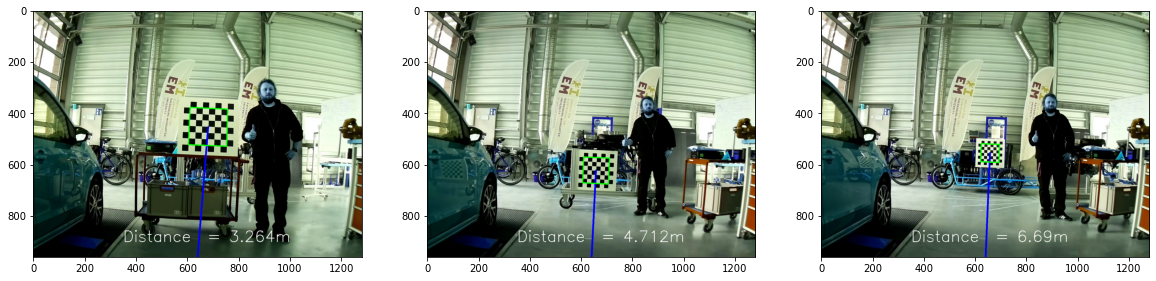

In [35]:
fig, axes = plt.subplots(1,3,figsize=(20,7))
axes[0].imshow(estimate_distance(near1,adis_mat))
axes[1].imshow(estimate_distance(known1,adis_mat))
axes[2].imshow(estimate_distance(far1,adis_mat))

In [344]:
result = estimate_distance(known1,adis_mat)
cv2.imwrite('Known.png',result)

result = estimate_distance(far1,adis_mat)
cv2.imwrite('Far.png',result)

result = estimate_distance(near1,adis_mat)
cv2.imwrite('Near.png',result)

True

In [ ]:
cv_board_center_x = int(board_center[1])
cv_board_center_y = int(board_center[0])

# Verification

In [516]:
left_corner = board_corners[0]

In [523]:
left_ones = np.ones(shape=(3,1))
left_ones[:2,0] = left_corner

In [524]:
left_ones

array([[684.88977051],
       [642.66766357],
       [  1.        ]])

In [525]:
right_corner = board_corners[6]

In [526]:
right_ones = np.ones(shape=(3,1))
right_ones[:2,0] = right_corner

In [539]:
right_ones[2,0] = 5.750224128553192

In [540]:
left_ones[2,0] = 5.750224128553192

In [541]:
distance_btw_corners = np.linalg.norm(left_ones-right_ones)

In [542]:
distance_btw_corners

114.21940338131182

In [543]:
right_ones

array([[798.98162842],
       [648.06396484],
       [  5.75022413]])

# Extracting Frames

In [587]:
video = cv2.VideoCapture('videoHD1.avi')
frame_count = 0

while True:
    # Read the next frame
    ret, frame = video.read()

    # Break the loop if there are no more frames
    if not ret:
        break

    # Process the frame as desired (e.g., save it to a file)
    cv2.imwrite(f'Frames/frame_{frame_count}.jpg', frame)

    # Increment the frame counter
    frame_count += 1


In [31]:
adis_mat = np.array([[1.34700000e+03, 0.00000000e+00, 6.28370691e+02],
 [0.00000000e+00, 1.23700000e+03, 4.81497605e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]) #USE THIS AS CAMERA MATRIX

In [617]:
cv_point0_x = known1.shape[1]/2
cv_point0_y = known1.shape[0]

In [697]:
estimate_distance(known,adis_mat)

(1.0068230893479886, 0.04052631377476321, 4.714089770551728)

In [104]:
pts = np.array([[25, 70], [25, 145],
                [75, 190], [150, 190],
                [200, 145], [200, 70],
                [150, 25], [75, 25]],
               np.int32)
 
pts = pts.reshape((-1, 1, 2))

In [105]:
pts

array([[[ 25,  70]],

       [[ 25, 145]],

       [[ 75, 190]],

       [[150, 190]],

       [[200, 145]],

       [[200,  70]],

       [[150,  25]],

       [[ 75,  25]]])

In [9]:
def undistort_image(testimage, width, height): #USED IN THIS TASK FOR REPORT
    
    image_points =  []
    object_points = []
    
    chessboard_gray = cv2.cvtColor(refimage,cv2.COLOR_BGR2GRAY)
    ret, object_corners = cv2.findChessboardCorners(chessboard_gray, patternSize = (width,height))
    object_corners = object_corners.reshape(width*height,2)
    object_pts = np.zeros(shape=(width*height,3))
    object_pts[:,:2] = object_corners[:,:]
    
    for i in range(1,13):                  #reading all frames
        image = cv2.imread(f'Frame{i}.png')
        image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        ret, image_corners = cv2.findChessboardCorners(image_gray, patternSize = (7,7))
        image_points.append(image_corners) #Collect all image points 
        object_points.append(object_pts)   #Collect all object points
    
    chessboard_gray = cv2.cvtColor(refimage,cv2.COLOR_BGR2GRAY)
    ret, object_corners = cv2.findChessboardCorners(chessboard_gray, patternSize = (width,height))
    
    object_corners = object_corners.reshape(width*height,2)
    object_points = np.zeros(shape=(width*height,3))
    object_points[:,:2] = object_corners[:,:]
    
    object_points = np.array(object_points, dtype = np.float32)
    image_points = np.array(image_corners, dtype = np.float32)
    
    #Begin Camera Calibration
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([object_points],[image_points],testimage.shape[::-1][1:],None,None)
    undist = cv2.undistort(testimage, mtx, dist, None, mtx) #Undistort the image
    
    return undist

In [20]:
undistort_image(test)

array([[1.07072099e+03, 0.00000000e+00, 7.66651801e+02],
       [0.00000000e+00, 9.91860120e+02, 5.55164267e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])